In [1]:
import os
imgdir = '../dataset'
imgfilec = os.path.join(imgdir, '45.bmp')
imgfile1 = os.path.join(imgdir, 'k02-05m-cropped.png')
imgfile2 = os.path.join(imgdir, 'k12-05m-cropped.png')

In [2]:
from skimage import io
imgc = io.imread(imgfilec)
type(imgc)

numpy.ndarray

In [3]:
print imgc.shape

(5600, 5600, 3)


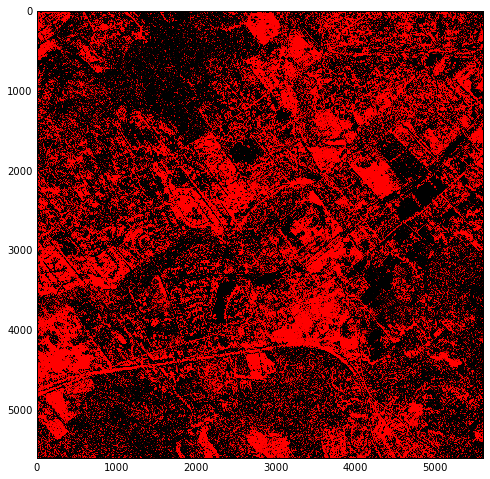

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(8,8))
plt.subplot(111).imshow(imgc)

In [5]:
# divide image arrays into grids based on preset step size
# @param: 2D RGB image as ndarray
# @param: grid_step_size should be divisible to image size
# @return: list of lists of divided ndarray (image grids)
def divide_image_into_grids_scaled(image, grid_step_size=50):
    assert image.shape[0]%grid_step==0
    assert image.shape[1]%grid_step==0
    image_grids = list()
    grid_rows = image.shape[0]/grid_step # number of grids along rows
    grid_cols = image.shape[1]/grid_step # number of grids along columns
    apr = 1e-10 # in case of zero division
    for r in range(grid_rows):
        row_image_grids = list()
        for c in range(grid_cols):
            tmp = image[r*grid_step:(r+1)*grid_step-1, c*grid_step:(c+1)*grid_step-1, :]
#             minC, maxC = np.min(tmp[:,:,:3]), np.max(tmp[:,:,:3])
#             for d in range(3):
#                 minC, maxC = np.min(tmp[:,:,d]), np.max(tmp[:,:,d])
#                 tmp[:,:,d] = (tmp[:,:,d] - minC)/(maxC - minC+apr)
            row_image_grids.append(tmp)
        image_grids.append(row_image_grids)
    return image_grids

In [6]:
# paraemeter setting to divide image into square grids
grid_step = 140 # unit in pixel, should be divisible to the image size
image_grids_c = divide_image_into_grids_scaled(imgc, grid_step)

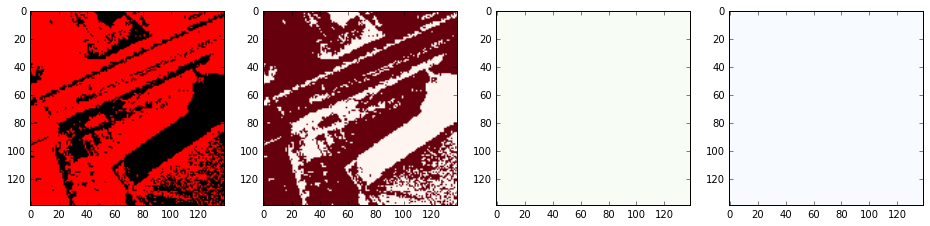

In [7]:
# plot example grids in RGB channels in image1
fig = plt.figure(figsize=(16,20))
plt.subplot(141).imshow(image_grids_c[0][0][:,:,:3])
plt.subplot(142).imshow(image_grids_c[0][0][:,:,0], cmap=plt.cm.Reds)
plt.subplot(143).imshow(image_grids_c[0][0][:,:,1], cmap=plt.cm.Greens)
plt.subplot(144).imshow(image_grids_c[0][0][:,:,2], cmap=plt.cm.Blues)

In [8]:
import numpy as np
np.unique(image_grids_c[0][0][:,:,0])

array([  0, 255], dtype=uint8)

In [16]:
def grid_change_labeling(pixel_block, percentage_threshold=40, pixel_threshold=128):
    valid_pixels = np.sum(pixel_block >= pixel_threshold)
    total_pixels = pixel_block.shape[0] * pixel_block.shape[1]
    return 1 if float(valid_pixels)/float(total_pixels)>=float(percentage_threshold)/100 else 0

In [17]:
# percentage_thres = 100 # percentage threshold to label this block as a significant change landscape
num_of_rows = len(image_grids_c)
label_map = list()
for r in range(num_of_rows):
    label_map.append(map(grid_change_labeling, image_grids_c[r]))
print len(label_map), len(label_map[0])

40 40


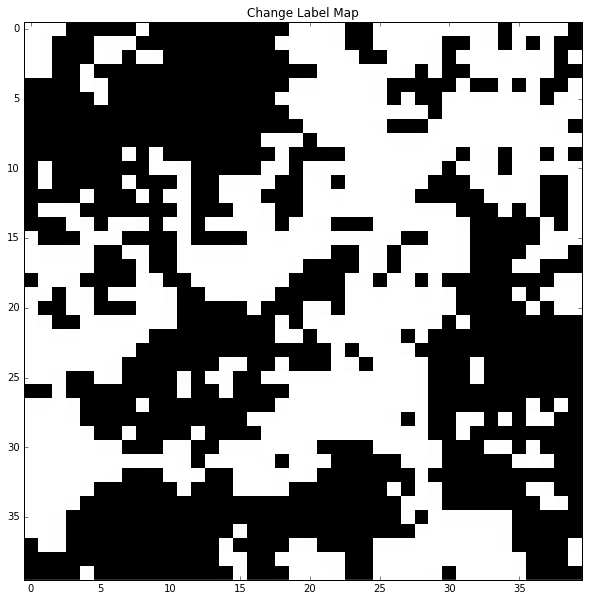

In [18]:
fig = plt.figure(figsize=(10,10))
im = plt.imshow(label_map, cmap=plt.cm.gray, interpolation='none')
plt.title("Change Label Map")
plt.show()

In [12]:
label_map = np.asarray(label_map, dtype=int)
label_map

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 0, ..., 1, 1, 1],
       [1, 1, 0, ..., 1, 1, 1],
       ..., 
       [1, 1, 1, ..., 0, 0, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 0, 0]])